In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# XGBoost
from xgboost import XGBRegressor

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('./../notebook/data/data.csv')
df.head()


,Unnamed: 0,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
X=df.drop(columns=['Calories','Unnamed: 0'],axis=1)
y=df['Calories']

In [14]:
X,y

(       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
 0        male   68   190.0    94.0      29.0       105.0       40.8
 1      female   20   166.0    60.0      14.0        94.0       40.3
 2        male   69   179.0    79.0       5.0        88.0       38.7
 3      female   34   179.0    71.0      13.0       100.0       40.5
 4      female   27   154.0    58.0      10.0        81.0       39.8
 ...       ...  ...     ...     ...       ...         ...        ...
 14995  female   20   193.0    86.0      11.0        92.0       40.4
 14996  female   27   165.0    65.0       6.0        85.0       39.2
 14997  female   43   159.0    58.0      16.0        90.0       40.1
 14998    male   78   193.0    97.0       2.0        84.0       38.3
 14999    male   63   173.0    79.0      18.0        92.0       40.5
 
 [15000 rows x 7 columns],
 0        231.0
 1         66.0
 2         26.0
 3         71.0
 4         35.0
          ...  
 14995     45.0
 14996     23.0
 14997     75.0

In [15]:
num_feature=X.select_dtypes(exclude='object').columns
cat_feature=X.select_dtypes(include='object').columns

num_transformer=StandardScaler()
cat_transformer=OneHotEncoder()

preprocessing=ColumnTransformer(
    [
        ('StandardScaler',num_transformer,num_feature),
        ('OneHotEncoder',cat_transformer,cat_feature),
    ]
)

In [16]:
X=preprocessing.fit_transform(X)

In [17]:
X.shape

(15000, 8)

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

X_train.shape,X_test.shape

((12000, 8), (3000, 8))

In [19]:
def evaluate_model(true,predict):
    mse=mean_squared_error(true,predict)
    mae=mean_absolute_error(true,predict)
    rmse=np.sqrt(mean_squared_error(true,predict))
    score=r2_score(true,predict)

    return mse,mae,rmse,score



In [24]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'K-Neighbor Regression':KNeighborsRegressor(),
    'Gradient Regression':GradientBoostingRegressor(),
    'SVM':SVR(),
    "XGBRegressor": XGBRegressor(),    
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]

    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mse,model_train_mae,model_train_rmse,model_train_score=evaluate_model(y_train,y_train_pred)
    model_test_mse,model_test_mae,model_test_rmse,model_test_score=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_score))
    r2_list.append(model_test_score)
    
    print('='*35)
    print('\n')








Linear Regression
Model performance for Training set
- Mean Squared Error: 126.9458
- Root Mean Squared Error: 11.2670
- Mean Absolute Error: 8.3068
- R2 Score: 0.9672
----------------------------------
Model performance for Test set
- Mean Squared Error: 131.9957
- Root Mean Squared Error: 11.4889
- Mean Absolute Error: 8.4415
- R2 Score: 0.9673


Ridge
Model performance for Training set
- Mean Squared Error: 126.9460
- Root Mean Squared Error: 11.2670
- Mean Absolute Error: 8.3065
- R2 Score: 0.9672
----------------------------------
Model performance for Test set
- Mean Squared Error: 132.0019
- Root Mean Squared Error: 11.4892
- Mean Absolute Error: 8.4412
- R2 Score: 0.9673


Lasso
Model performance for Training set
- Mean Squared Error: 150.1709
- Root Mean Squared Error: 12.2544
- Mean Absolute Error: 9.0122
- R2 Score: 0.9612
----------------------------------
Model performance for Test set
- Mean Squared Error: 157.8954
- Root Mean Squared Error: 12.5656
- Mean Absolute Error:

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,XGBRegressor,0.998868
4,Random Forest,0.998252
6,Gradient Regression,0.996762
5,K-Neighbor Regression,0.993511
3,Decision Tree,0.993006
7,SVM,0.992866
0,Linear Regression,0.967294
1,Ridge,0.967292
2,Lasso,0.960876


In [28]:
xgb=XGBRegressor()
xgb=xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
score=r2_score(y_test,y_pred)%100
print("XGBoost R-squared: %.2f" %score)

XGBoost R-squared: 1.00


Text(0, 0.5, 'Predicted')

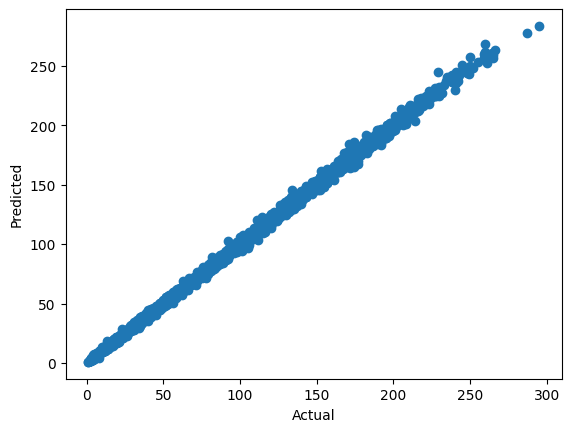

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
11499,173.0,172.076447,0.923553
6475,189.0,195.785797,-6.785797
13167,53.0,51.708874,1.291126
862,161.0,162.325150,-1.325150
5970,226.0,225.297104,0.702896
...,...,...,...
6216,186.0,185.230515,0.769485
3585,53.0,55.843807,-2.843807
10023,120.0,121.507759,-1.507759
14044,20.0,19.239851,0.760149
